In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image
import os

In [2]:
# 讀入一張要判斷色階的圖片 (colorbar)
raw = cv2.imread("Adobe_colorbar_non_Sort.png", cv2.IMREAD_COLOR)
res = np.zeros(shape=raw.shape, dtype=raw.dtype)

# 拆 BGR 通道
B, G, R = raw[::,::,0],raw[::,::,1],raw[::,::,2]
# 計算亮度是用浮點數
B,G,R = B/255., G/255., R/255.
# 公式參照 : HSP Color Model — Alternative to HSV (HSB) and HSL
# url: https://alienryderflex.com/hsp.html
L = np.sqrt( 0.299*R**2 + 0.587*G**2 + 0.114*B**2)  # 計算感知亮度公式

_flt_L_idx = np.argsort(L.reshape(-1))  # 算好排序過的 IDX
_flt_raw = raw.reshape((1,-1,3))  # 統一展平
_flt_res = res.reshape((1,-1,3))  # 統一展平

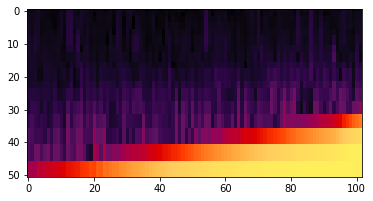

In [29]:
# 尚未排序的
plt.imshow(cv2.cvtColor(raw, cv2.COLOR_BGR2RGB));
plt.show()

In [4]:
# 排序好的 IDX 跟 走訪用的不要搞混。。。
for i,sort_idx in enumerate(_flt_L_idx):
    _flt_res[0][i] = _flt_raw[0, sort_idx]

In [5]:
_flt_result = _flt_res.copy()  # 後續計算不重複色階用
_flt_res = _flt_res.reshape(raw.shape)  # 展示排序結果用，注意是1D排好，畫2D顯示，所以亮度會呈現斜斜的

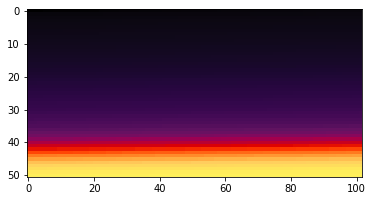

In [30]:
# 呈現排好的 2D
plt.imshow(cv2.cvtColor(_flt_res, cv2.COLOR_BGR2RGB));

In [7]:
# 儲存
cv2.imwrite("Adobe_colorbar_2d_Sorted.png", _flt_res)

True

In [8]:
# 接下來計算 不重複元素構成的 colorbar
all_diff_result = []

# _flt_result.shape = (1, 5202, 3)
for i in range(_flt_result.shape[1]):
    if len(all_diff_result) == 0:
        all_diff_result.append(_flt_result[0, i])
    
    else:
        if np.all(all_diff_result[-1] == _flt_result[0, i]): # 上一個元素跟這次要加上的元素相同的話
            pass
        else:
            all_diff_result.append(_flt_result[0, i])
all_diff_result = np.array(all_diff_result, np.uint8)

In [9]:
# 已經計算出不重複的，但是資料很細。
all_diff_result = all_diff_result.reshape(-1,1,3)
all_diff_result.shape

(285, 1, 3)

In [10]:
#  加粗，注意是 指數次方增粗 (粗度倍率 = 2^thickness)
thickness = 4
for i in range(thickness):
    all_diff_result = np.hstack((all_diff_result,all_diff_result))

In [11]:
#應該會是細長的 RGB圖片
all_diff_result.shape

(285, 16, 3)

In [12]:
cv2.imwrite("Adobe_colorbar_nonRepeat.png",all_diff_result)

True

In [31]:
# 給別人用的
all_diff_result_rgb = cv2.cvtColor(all_diff_result, cv2.COLOR_BGR2RGB)

In [32]:
all_diff_result_rgb[::,1]

array([[  0,   0,   0],
       [  1,   1,   2],
       [  2,   1,   2],
       [  2,   1,   3],
       [  2,   2,   4],
       [  3,   2,   4],
       [  4,   3,   6],
       [  5,   3,   7],
       [  5,   4,   8],
       [  6,   4,   8],
       [  6,   4,   9],
       [  6,   5,  10],
       [  7,   5,  10],
       [  7,   5,  11],
       [  8,   5,  11],
       [  8,   6,  12],
       [  9,   6,  13],
       [  9,   7,  14],
       [ 10,   7,  14],
       [ 10,   7,  15],
       [ 10,   7,  16],
       [ 11,   7,  16],
       [ 11,   7,  17],
       [ 11,   8,  17],
       [ 11,   8,  18],
       [ 12,   8,  18],
       [ 12,   8,  19],
       [ 12,   8,  20],
       [ 13,   8,  20],
       [ 13,   8,  21],
       [ 13,   8,  22],
       [ 14,   8,  22],
       [ 14,   8,  23],
       [ 15,   9,  24],
       [ 15,   9,  25],
       [ 16,   9,  26],
       [ 16,   9,  27],
       [ 17,   9,  28],
       [ 17,   9,  29],
       [ 18,   9,  30],
       [ 18,   9,  31],
       [ 18,   9